In [6]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import os

## Plan
* Read in one file
* Average the profiles
* Find the wall location
* Read in all the files and calculate overall averages
* Fit the Spaulding profile using k=0.41, B=5
* Use u_tau from Spaulding fit to transform to wall coordinates
* TBD

In [19]:
def read_initial_tecplot_file(file_path):
    '''
    This function reads the initial tecplot file
    :param file_path: path to the file used for x and y coordinates and wall location calculation
    :return: 
    x_points: x coordinates in the grid
    y_points: y coordinates in the grid
    v_matrix: v velocity components as a 2D numpy array
    u_matrix: u velocity components as a 2D numpy array
    '''
    # Initialize data lists
    x_points = []
    y_points = []
    v_values = []
    u_values = []
    
    # Open the file and read line by line
    with open(file_path, 'r') as file:
        for _ in range(3):
            next(file)
        for line in file:
            # Split line by space
            parts = line.split()
            # Extract data
            x = float(parts[0])
            y = float(parts[1])
            v = float(parts[2])
            u = float(parts[3])

            # Append data to respective lists
            if -x not in x_points:
                x_points.append(-x)
            if y not in y_points:
                y_points.append(y)
            v_values.append(v)
            u_values.append(-u)

    # Convert lists to numpy arrays and reshape for 2D matrices
    v_matrix = np.array(v_values).reshape(131, 324)
    u_matrix = np.array(u_values).reshape(131, 324)

    return x_points, y_points, v_matrix, u_matrix

def read_tecplot_file(file_path):
    '''
    Read a tecplot file and only returns u and v values
    :param file_path: path to the .dat file
    :return: 
    v_matrix: v velocity components as a 2D numpy array
    u_matrix: u velocity components as a 2D numpy array
    '''
    v_values = []
    u_values = []
    
    # Open the file and read line by line
    with open(file_path, 'r') as file:
        for _ in range(3):
            next(file)
        for line in file:
            # Split line by space
            parts = line.split()
            # Extract data
            v = float(parts[2])
            u = float(parts[3])

            # Append data to respective lists
            v_values.append(v)
            u_values.append(-u)

    # Convert lists to numpy arrays and reshape for 2D matrices
    v_matrix = np.array(v_values).reshape(131, 324)
    u_matrix = np.array(u_values).reshape(131, 324)

    return v_matrix, u_matrix

def get_data(num_files, folder_path, wall_location):
    '''
    This function reads a specified number of tecplot data files from a specified folder
    :param num_files: number of files to read
    :param folder_path: path to folder containing the files
    :param wall_location: location of the wall in original x coordinates
    :return: 
    x_points: x coordinates in the grid
    y_points: y coordinates in the grid
    v_matrix: list of v velocity components as 2D numpy arrays for all files
    u_matrix: list of u velocity components as 2D numpy arrays for all files 
    '''
    xy_grid_defined = False
    x_points = []
    y_points = []
    v_values = []
    u_values = []
    
    # Determine the file name
    for i in range(1, num_files+1):
        v_file = []
        u_file = []
        if i < 10:
            filename = f"{folder_path}B0000{i}.dat"
        elif i < 100:
            filename = f"{folder_path}B000{i}.dat"
        elif i < 1000:
            filename = f"{folder_path}B00{i}.dat"
        else:
            filename = f"{folder_path}B0{i}.dat"
        
        # Open the file and read the data
        with open(filename, 'r') as file:
            for _ in range(3):
                next(file)
            for line in file:
                # Split line by space
                parts = line.split()
                # Extract data
                x = float(parts[0])
                y = float(parts[1])
                v = float(parts[2])
                u = float(parts[3])
    
                # Append data to respective lists
                if x < wall_location:
                    if not xy_grid_defined:
                        if -x not in x_points:
                            x_points.append(-x)
                        if y not in y_points:
                            y_points.append(y)
                    v_file.append(v)
                    u_file.append(-u)
            
            # Mark the xy grid as defined after reading the first file
            xy_grid_defined = True
            
            # Add the 2D arrays to the list
            v_values.append(v_file)
            u_values.append(u_file)

    # Convert lists to numpy arrays and reshape for 2D matrices
    num_x_points = len(x_points)
    v_matrix = np.array(v_values).reshape(131, num_x_points)
    u_matrix = np.array(u_values).reshape(131, num_x_points)

    return x_points, y_points, v_matrix, u_matrix

In [20]:
x_grid, y_grid, v_cal, u_cal = read_tecplot_file("piv-data/B00001.dat")

In [25]:
def contourplot(x_points, y_points, matrix):
    plt.figure(figsize=(16, 8))
    plt.contourf(x_points, y_points, matrix)
    plt.colorbar()
    plt.title("Contour plot")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

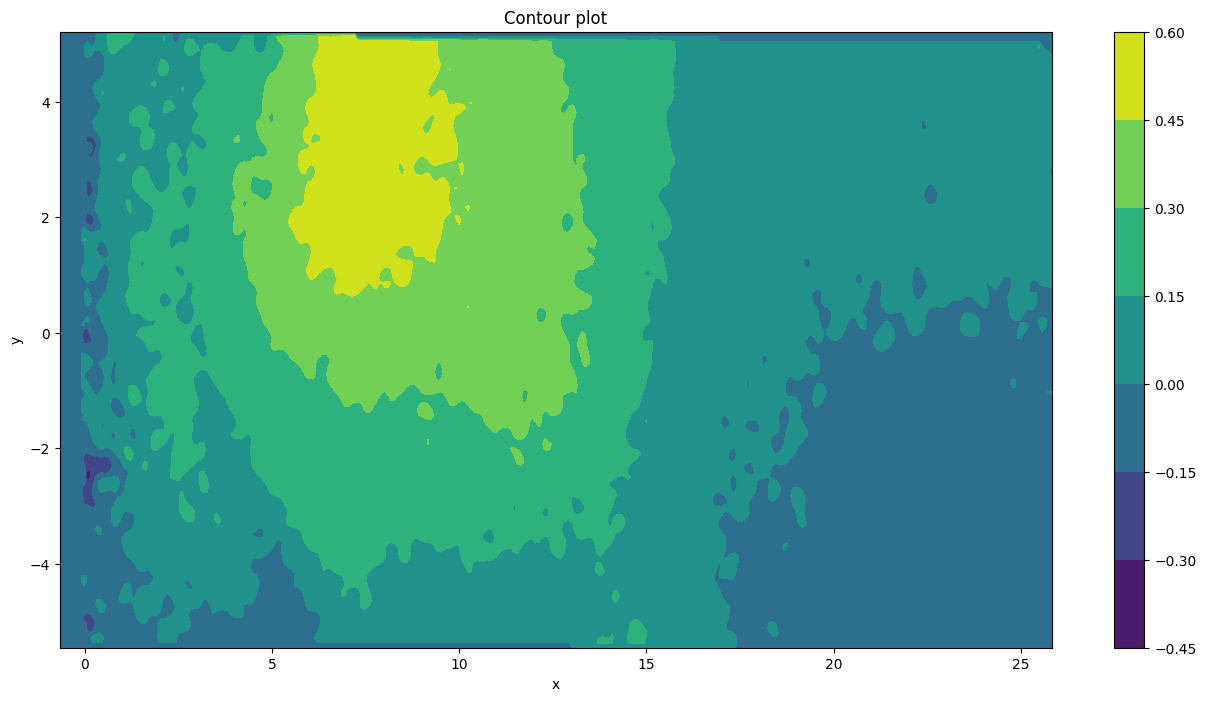

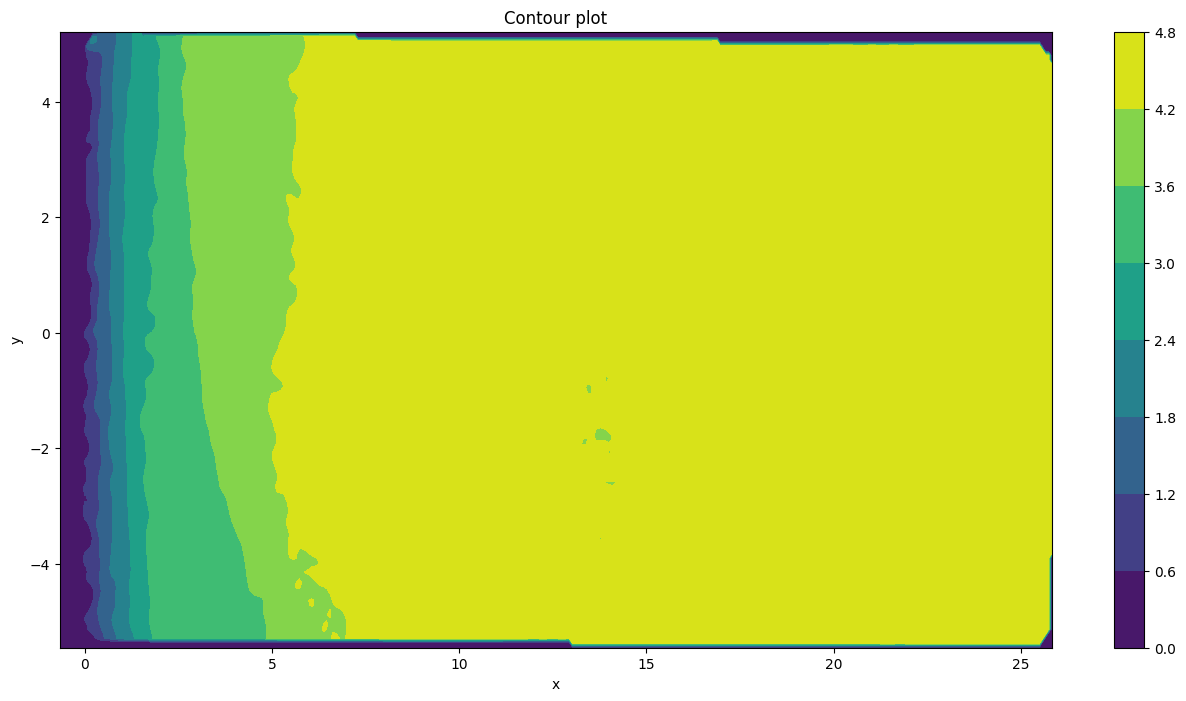

In [26]:
contourplot(x_grid, y_grid, v_cal)
contourplot(x_grid, y_grid, u_cal)

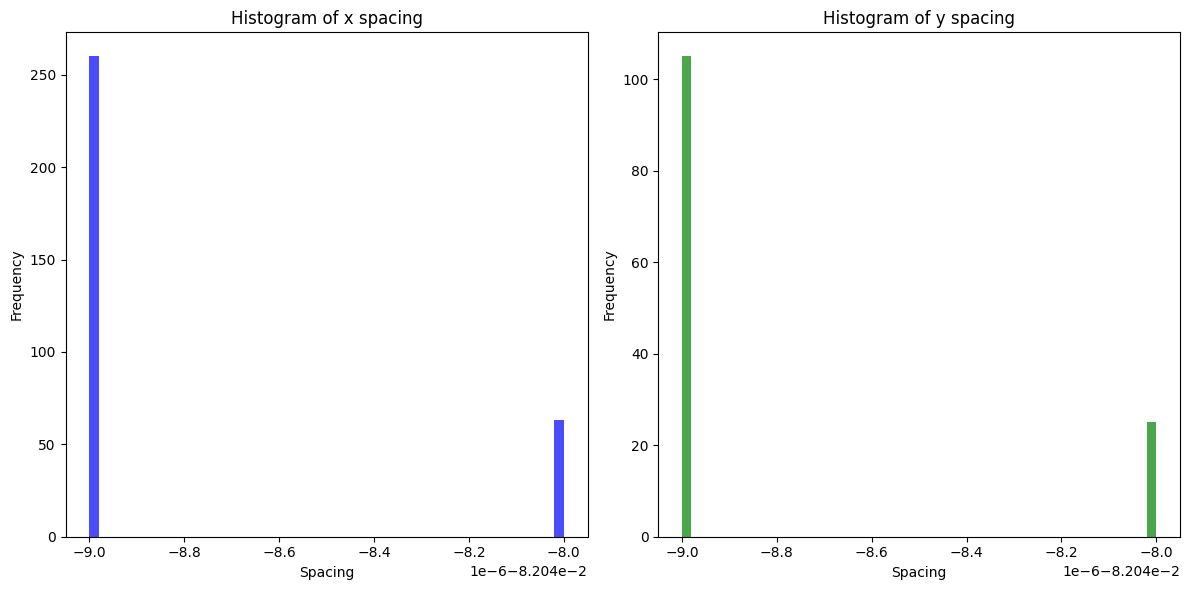

In [27]:
x_spacing = []
y_spacing = []
x_spacing.extend(np.diff(x_grid))
y_spacing.extend(np.diff(y_grid))
# Plot histograms of x and y spacings
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(x_spacing, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of x spacing')
plt.xlabel('Spacing')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(y_spacing, bins=50, color='green', alpha=0.7)
plt.title('Histogram of y spacing')
plt.xlabel('Spacing')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()